# implementation of  L1 and L2 norm to regularize a linear regression model.
                                           

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

The codding challege of  week 3  is to implementation of u the L1 and L2 norm to regularize a linear regression model.

In [2]:
dataFrame = pd.read_csv('ADRvsRating.csv')#read the file of type csv

Cols = ['ADR','Rating']#taking title of only required columns in the dataset

dataFrame = dataFrame[Cols]#consider only those columns which are required and drop the other columns

#print the data
print(dataFrame.head())
print('count of dataset = ',len(dataFrame))

    ADR  Rating
0  85.0   117.0
1  83.5   110.0
2  78.2   102.0
3  68.1    97.0
4  66.3    86.0
count of dataset =  1000


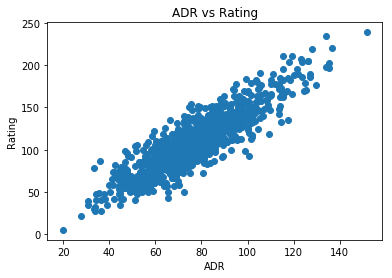

In [3]:
#plot data in the 2d space to visullize
plt.scatter(dataFrame['ADR'],dataFrame['Rating'])
plt.title('ADR vs Rating')
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [4]:
data = dataFrame.as_matrix()#conver the data into matrix format

In [5]:
#step to gradient descent
def step_gradient(b_current,m_current,points, learningRate):
    b_gradient = 0
    m_gradient = 0

    N = float(len(points))
    
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y - ( m_current * x + b_current)) 
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        

    new_b = b_current - (learningRate * b_gradient) 
    new_m = m_current - (learningRate * m_gradient)
    
    return [new_b, new_m]

In [13]:
def step_gradient_with_l1(b_current,m_current,points, learningRate):
    b_gradient = 0
    m_gradient = 0
    lamb=1 #parameter for penalty term
    
    
    
    N = float(len(points))
    
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y - ( m_current * x + b_current))
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        
    #here we are adding derivative of panalty tearm with respect to weight in
    #the derivative of with respect to meansquare error
    #here the derivative of l1 is weigth/absoute(weigth) 
    
        m_gradient -= (1/2) * (m_gradient)/np.absolute(m_gradient)# calculate l1 norm based on the weight


    new_b = b_current - (learningRate * b_gradient) 
    new_m = m_current - (learningRate * m_gradient)
    
    return [new_b, new_m]

In [7]:
def step_gradient_with_l2(b_current,m_current,points, learningRate):
    b_gradient = 0
    m_gradient = 0
    lamb=1000 #parameter for penaramete

    N = float(len(points))
    
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y - ( m_current * x + b_current))
        m_gradient += m_current-(2/N) * x * (y - (m_current * x + b_current))
        t# calculate l2 norm based on the weight
        
        #gradient plus the derivative of lausso regression
   
    new_b = b_current - (learningRate * b_gradient) 
    new_m = m_current - (learningRate * m_gradient)
    
    return [new_b, new_m]

In [8]:
def gradient_descent_runner(points, starting_b, starting_m, learningRate, iterations):
    b = starting_b
    m = starting_m
    
    for i in range(iterations):

        b1, m1 = step_gradient(b, m, points,learningRate)
        b2, m2 = step_gradient_with_l1(b,m,points, learningRate)
        b3, m3 = step_gradient_with_l2(b,m,points, learningRate)
    return (b1,m1,b2,m2,b3,m3)

In [9]:
#hyperparameters
learningRate = 1e-4
iterations = 1000
initial_b = 0
initial_m = 0

b1, m1, b2, m2, b3, m3 = gradient_descent_runner(data,initial_b, initial_m,learningRate, iterations)


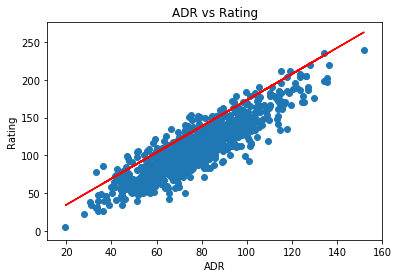

In [10]:
plt.plot(np.array(dataFrame['ADR']), np.array(m1*dataFrame['ADR']) + b1,'red')
plt.scatter(dataFrame['ADR'],dataFrame['Rating'])
plt.title('ADR vs Rating')
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

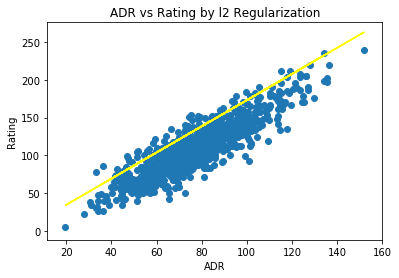

In [11]:
plt.plot(np.array(dataFrame['ADR']), np.array(m3*dataFrame['ADR']) + b3,'yellow')
plt.scatter(dataFrame['ADR'],dataFrame['Rating'])
plt.title('ADR vs Rating by l2 Regularization')
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [12]:
print('m and b :')
print('m1= ',m1,"--- b1= ",b1)
print()

print('m and b with l1 Regularization:')
print('m2= ',m2,"--- b1= ",b2)
print()

print('m and b with l2 Regularization:')
print('m2= ',m3,"--- b1= ",b3)

m and b :
m1=  1.7313251 --- b1=  0.0212832

m and b with l1 Regularization:
m2=  1.6813251 --- b1=  0.0212832

m and b with l2 Regularization:
m2=  1.7313251 --- b1=  0.0212832
